# Data Source

The 2015 data came from this link from the CDC's website. The csv with all the responses and the key donoting the data terms are also available. The link to the survey questions is <a href="https://www.cdc.gov/brfss/questionnaires/pdf-ques/2015-brfss-questionnaire-12-29-14.pdf">here</a>

The page on the CDC's website containing the data is <a href="https://www.cdc.gov/brfss/annual_data/annual_data.htm">here</a>.

The data on the CDC's page is in an ASCII format and hard too decode. We found a CSV version of that data on Kaggle. The download link for the CSV is specifically <a href="https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system">here</a>.

Full Link: https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


# Data Preparation

The data set has a significant number of columns (330). Cleaning all these columns is not feasible with the time and resource constraints.

## Column Selection by Intuition

* We went in and picked features that from intuition were related to diabetes. These columns were:


* Diabetes_binary
* HighBP
* Asthma
* HighChol
* CholCheck
* BMI
* Smoker
* Stroke
* HeartDiseaseorAttack
* PhysActivity
* Fruits
* Veggies
* HvyAlcoholConsump
* AnyHealthcare
* NoDocbcCost
* GenHlth
* MentHlth
* Employed
* PhysHlth
* DiffWalk
* Sex
* Age
* Chronic_Cancer
* Education
* Income

## Addressing Missing Values

* After selecting only those columns from the dataframe, we then checked for missing values.

* Columns that had over 50% of the data missing dropped.

Some of other features had around 11% of data missing. Normally, we would fill those with the mean, median, or mode depending on the data type. However, given the  machine constraints we cannot use  440K records for iterative modeling.

So we dropped those rows leaving us with around 330K records. More than enough data given the scope of this study.

Next we reviewed the values of the data in the columns above using the <a href="https://www.cdc.gov/brfss/questionnaires/pdf-ques/2015-brfss-questionnaire-12-29-14.pdf">data map</a>provided by the CDC. 

Using the key, we either:

* dropped the rows
* consolidated the responses into one value
* made the data ordinal

Here are some examples of these approaches:

* If the response to a question was refused or didn't know, that value was dropped.
* For example, for employment, we mapped employed and self employed to the same value since we want this feature to explore the effect of employment versus unemployment on diabetes prediction.
* High cholesterol had values of yes - 1 and no -2. Converted to 0 - no and 1 - yes for simplicity.

Next we changed the column names to be more readable from the CDC keys. Here are the transformations

* DIABETE3 --> Diabetes_012
* _RFHYPE5 --> HighBP
* TOLDHI2 --> HighChol
* _CHOLCHK --> CholCheck
* _BMI5 --> BMI
* SMOKE100 --> Smoker
* CVDSTRK3 --> Stroke
* _MICHD --> HeartDiseaseorAttack
* _TOTINDA --> PhysActivity
* _FRTLT1 --> Fruits
* _VEGLT1 --> "Veggies"
* _RFDRHV5 --> HvyAlcoholConsump
* HLTHPLN1 --> AnyHealthcare
* MEDCOST --> NoDocbcCost
* GENHLTH --> GenHlth
* MENTHLTH --> MentHlth
* PHYSHLTH --> PhysHlth
* DIFFWALK --> DiffWalk
* SEX --> Sex
* _AGEG5YR --> Age
* EDUCA --> Education
* INCOME2 --> Income
* EMPLOY1 --> Employed
* CHCOCNCR --> Chronic_Cancer
* ASTHMA3 --> Asthma
* WEIGHT2 --> Weight(lbs)


Next we reviewed the data and found a class imbalance between the patients who have diabetes and those who do not.


![Imbalance](images/Diabetes_Counts_Imbal.png)



Given the large number of records, we to create a balanced data set by randomly selected an equal number of diabetic and non-diabetic patients. The total number of records in each class was 35,126


![Balance](images/Diab_Bal.png)


The final dataset was saved to a CSV and use in the analysis in the index notebook.

In [2]:
# Download the 2015 CSV using the links above on local machine.
# Read csv using pandas and store output in dataframe.

dia_bf_df = pd.read_csv('BRFSS_2015/2015.csv')

In [3]:
dia_bf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Columns: 330 entries, _STATE to _AIDTST3
dtypes: float64(323), object(7)
memory usage: 1.1+ GB


In [4]:
dia_bf_df.columns

Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENUM',
       ...
       '_PAREC1', '_PASTAE1', '_LMTACT1', '_LMTWRK1', '_LMTSCL1', '_RFSEAT2',
       '_RFSEAT3', '_FLSHOT6', '_PNEUMO2', '_AIDTST3'],
      dtype='object', length=330)

In [5]:
#check that the data loaded in is in the correct format
pd.set_option('display.max_columns', 500)
dia_bf_df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAIN,SEATBELT,FLUSHOT6,FLSHTMY2,IMFVPLAC,PNEUVAC3,HIVTST6,HIVTSTD3,WHRTST10,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,CAREGIV1,CRGVREL1,CRGVLNG1,CRGVHRS1,CRGVPRB1,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,VIDFCLT2,VIREDIF3,VIPRFVS2,VINOCRE2,VIEYEXM2,VIINSUR2,VICTRCT4,VIGLUMA2,VIMACDG2,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,WTCHSALT,LONGWTCH,DRADVISE,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,TETANUS,HPVADVC2,HPVADSHT,SHINGLE2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PROFEXAM,LENGEXAM,BLDSTOOL,LSTBLDS3,HADSIGM3,HADSGCO1,LASTSIG3,PCPSAAD2,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,PCPSADE1,PCDMDECN,SCNTMNY1,SCNTMEL1,SCNTPAID,SCNTWRK1,SCNTLPAD,SCNTLWK1,SXORIENT,TRNSGNDR,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,MISTMNT,ADANXEV,QSTVER,QSTLANG,EXACTOT1,EXACTOT2,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,3.0,1.000000e+00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,15.0,18.0,10.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,NaN,2.0,1.0,4.0,1.0,2.0,NaN,1.0,2.0,8.0,88.0,3.0,2.0,280.0,510.0,NaN,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,NaN,2.0,3.0,888.0,NaN,NaN,NaN,305.0,310.0,320.0,310.0,305.0,101.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0,1.0,1.0,1.0,6.0,1.0,1.0,112014.0,1.0,1.0,1.0,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,b'',b'',3.0,11011.0,28.78156,3.0,86.344681,NaN,NaN,NaN,NaN,1.0,0.614125,341.384853,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,9.0,1.0,63.0,5.0,70.0,178.0,12701.0,4018.0,4.0,2.0,1.0,2.0

In [6]:
# There are 330 columns which are too much to compute with the resources/time available
# Picking columns related to diabetes

dia_cols_selected = ['DIABETE3','_RFHYPE5',  
                                         'ASTHMA3','TOLDHI2', '_CHOLCHK', 
                                         '_BMI5', 
                                         'SMOKE100', 
                                         'CVDSTRK3', '_MICHD', 
                                         '_TOTINDA', 
                                         '_FRTLT1', '_VEGLT1', 
                                         '_RFDRHV5' ,'AVEDRNK2','PAINACT2',
                                         'HLTHPLN1', 'MEDCOST' ,
                                         'GENHLTH', 'MENTHLTH','EMPLOY1' ,'PHYSHLTH', 'DIFFWALK', 
                                         'SEX', '_AGEG5YR','CHCOCNCR', 'EDUCA','WEIGHT2' ,'INCOME2' ]

In [7]:
dia_cols_df = dia_bf_df[dia_cols_selected]

dia_cols_df.shape

(441456, 28)

In [8]:
dia_cols_df.head()

,DIABETE3,_RFHYPE5,ASTHMA3,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,_MICHD,_TOTINDA,_FRTLT1,_VEGLT1,_RFDRHV5,AVEDRNK2,PAINACT2,HLTHPLN1,MEDCOST,GENHLTH,MENTHLTH,EMPLOY1,PHYSHLTH,DIFFWALK,SEX,_AGEG5YR,CHCOCNCR,EDUCA,WEIGHT2,INCOME2
0,3.0,2.0,1.0,1.0,1.0,4018.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0,2.0,5.0,18.0,8.0,15.0,1.0,2.0,9.0,2.0,4.0,280.0,3.0
1,3.0,1.0,2.0,2.0,2.0,2509.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,NaN,NaN,2.0,1.0,3.0,88.0,3.0,88.0,2.0,2.0,7.0,2.0,6.0,165.0,1.0
2,3.0,1.0,2.0,1.0,1.0,2204.0,NaN,1.0,NaN,9.0,9.0,9.0,9.0,NaN,NaN,1.0,2.0,4.0,88.0,7.0,15.0,NaN,2.0,11.0,1.0,4.0,158.0,99.0
3,3.0,2.0,2.0,1.0,1.0,2819.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,NaN,NaN,1.0,1.0,5.0,30.0,8.0,30.0,1.0,2.0,9.0,1.0,4.0,180.0,8.0
4,3.0,1.0,2.0,2.0,1.0,2437.0,2.0,2.0,2.0,2.0,9.0,1.0,1.0,NaN,NaN,1.0,2.0,5.0,88.0,8.0,20.0,2.0,2.0,9.0,2.0,5.0,142.0,77.0


In [9]:
dia_cols_df.isna().sum()

DIABETE3         7
_RFHYPE5         0
ASTHMA3          0
TOLDHI2      59154
_CHOLCHK         0
_BMI5        36398
SMOKE100     14255
CVDSTRK3         0
_MICHD        3942
_TOTINDA         0
_FRTLT1          0
_VEGLT1          0
_RFDRHV5         0
AVEDRNK2    230618
PAINACT2    441456
HLTHPLN1         0
MEDCOST          1
GENHLTH          2
MENTHLTH         0
EMPLOY1          0
PHYSHLTH         1
DIFFWALK     12334
SEX              0
_AGEG5YR         0
CHCOCNCR         0
EDUCA            0
WEIGHT2       5315
INCOME2       3301
dtype: int64

In [10]:
# Find percentage of values missing in each column

dia_cols_df.isna().sum()/dia_cols_df.shape[0]*100

DIABETE3      0.001586
_RFHYPE5      0.000000
ASTHMA3       0.000000
TOLDHI2      13.399750
_CHOLCHK      0.000000
_BMI5         8.244989
SMOKE100      3.229087
CVDSTRK3      0.000000
_MICHD        0.892954
_TOTINDA      0.000000
_FRTLT1       0.000000
_VEGLT1       0.000000
_RFDRHV5      0.000000
AVEDRNK2     52.240314
PAINACT2    100.000000
HLTHPLN1      0.000000
MEDCOST       0.000227
GENHLTH       0.000453
MENTHLTH      0.000000
EMPLOY1       0.000000
PHYSHLTH      0.000227
DIFFWALK      2.793936
SEX           0.000000
_AGEG5YR      0.000000
CHCOCNCR      0.000000
EDUCA         0.000000
WEIGHT2       1.203970
INCOME2       0.747753
dtype: float64

In [11]:
# Drop columns average drink and painact since over 50% of the data is missing

# Drop the rest of the rows. Normally for _VegeSym and TOLDHI2 would replace with the mean or most common values

# However, due to the significant number of rows (440K) and the computing limits of the machine, we are dropping all the rows

In [12]:
dia_cols_df = dia_cols_df.drop(['AVEDRNK2','PAINACT2'],axis=1)

dia_cols_df.shape

(441456, 26)

In [13]:
# Drop NA in rows reduce data size to process on current computing power

dia_cols_df = dia_cols_df.dropna()

dia_cols_df.shape

(343606, 26)

Citing inspiration for the process here of cleaning this dataset <a href="https://www.kaggle.com/code/alexteboul/diabetes-health-indicators-dataset-notebook/notebook">here</a>. Used the code and strategy too assist with cleaning the data. Added a few more features in such as chronic cancer, ashtma, and employment. In case of dead links, the process below was inspired by kaggle user alexteboul set.

In [14]:
# Strategy for column DIABETE3
# going to make this ordinal. 0 is for no diabetes or only during pregnancy, 1 is for pre-diabetes or borderline diabetes, 2 is for yes diabetes
# Remove all 7 (dont knows)
# Remove all 9 (refused)

dia_cols_df['DIABETE3'] = dia_cols_df['DIABETE3'].replace({2:0, 3:0, 1:2, 4:1})
dia_cols_df = dia_cols_df[dia_cols_df.DIABETE3 != 7]
dia_cols_df = dia_cols_df[dia_cols_df.DIABETE3 != 9]
dia_cols_df.DIABETE3.unique()

array([0., 2., 1.])

In [15]:
#1 _RFHYPE5
#Change 1 to 0 so it represetnts No high blood pressure and 2 to 1 so it represents high blood pressure
dia_cols_df['_RFHYPE5'] = dia_cols_df['_RFHYPE5'].replace({1:0, 2:1})
dia_cols_df = dia_cols_df[dia_cols_df._RFHYPE5 != 9]
dia_cols_df._RFHYPE5.unique()

array([1., 0.])

In [16]:
#2 TOLDHI2
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
dia_cols_df['TOLDHI2'] = dia_cols_df['TOLDHI2'].replace({2:0})
dia_cols_df = dia_cols_df[dia_cols_df.TOLDHI2 != 7]
dia_cols_df = dia_cols_df[dia_cols_df.TOLDHI2 != 9]
dia_cols_df.TOLDHI2.unique()

array([1., 0.])

In [17]:
#3 _CHOLCHK
# Change 3 to 0 and 2 to 0 for Not checked cholesterol in past 5 years
# Remove 9
dia_cols_df['_CHOLCHK'] = dia_cols_df['_CHOLCHK'].replace({3:0,2:0})
dia_cols_df = dia_cols_df[dia_cols_df._CHOLCHK != 9]
dia_cols_df._CHOLCHK.unique()

array([1., 0.])

In [18]:
#4 _BMI5 (no changes, just note that these are BMI * 100. So for example a BMI of 4018 is really 40.18)
dia_cols_df['_BMI5'] = dia_cols_df['_BMI5'].div(100).round(0)
dia_cols_df._BMI5.unique()

array([40., 25., 28., 24., 27., 30., 26., 23., 34., 33., 21., 22., 31.,
       38., 20., 19., 32., 46., 41., 37., 36., 29., 35., 18., 54., 45.,
       39., 47., 43., 55., 49., 42., 17., 16., 48., 44., 50., 59., 15.,
       52., 53., 57., 51., 14., 58., 63., 61., 56., 60., 74., 62., 64.,
       13., 66., 73., 65., 68., 85., 71., 84., 67., 70., 82., 79., 92.,
       72., 88., 96., 81., 12., 77., 95., 75., 91., 69., 76., 87., 89.,
       83., 98., 86., 80., 90., 78., 97.])

In [19]:
#5 SMOKE100
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
dia_cols_df['SMOKE100'] = dia_cols_df['SMOKE100'].replace({2:0})
dia_cols_df = dia_cols_df[dia_cols_df.SMOKE100 != 7]
dia_cols_df = dia_cols_df[dia_cols_df.SMOKE100 != 9]
dia_cols_df.SMOKE100.unique()

array([1., 0.])

In [20]:
#6 CVDSTRK3
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
dia_cols_df['CVDSTRK3'] = dia_cols_df['CVDSTRK3'].replace({2:0})
dia_cols_df = dia_cols_df[dia_cols_df.CVDSTRK3 != 7]
dia_cols_df = dia_cols_df[dia_cols_df.CVDSTRK3 != 9]
dia_cols_df.CVDSTRK3.unique()

array([0., 1.])

In [21]:
#7 _MICHD
#Change 2 to 0 because this means did not have MI or CHD
dia_cols_df['_MICHD'] = dia_cols_df['_MICHD'].replace({2: 0})
dia_cols_df._MICHD.unique()

array([0., 1.])

In [22]:
#8 _TOTINDA
# 1 for physical activity
# change 2 to 0 for no physical activity
# Remove all 9 (don't know/refused)
dia_cols_df['_TOTINDA'] = dia_cols_df['_TOTINDA'].replace({2:0})
dia_cols_df = dia_cols_df[dia_cols_df._TOTINDA != 9]
dia_cols_df._TOTINDA.unique()

array([0., 1.])

In [23]:
#9 _FRTLT1
# Change 2 to 0. this means no fruit consumed per day. 1 will mean consumed 1 or more pieces of fruit per day 
# remove all dont knows and missing 9
dia_cols_df['_FRTLT1'] = dia_cols_df['_FRTLT1'].replace({2:0})
dia_cols_df = dia_cols_df[dia_cols_df._FRTLT1 != 9]
dia_cols_df._FRTLT1.unique()

array([0., 1.])

In [24]:
#10 _VEGLT1
# Change 2 to 0. this means no vegetables consumed per day. 1 will mean consumed 1 or more pieces of vegetable per day 
# remove all dont knows and missing 9
dia_cols_df['_VEGLT1'] = dia_cols_df['_VEGLT1'].replace({2:0})
dia_cols_df = dia_cols_df[dia_cols_df._VEGLT1 != 9]
dia_cols_df._VEGLT1.unique()

array([1., 0.])

In [25]:
#11 _RFDRHV5
# Change 1 to 0 (1 was no for heavy drinking). change all 2 to 1 (2 was yes for heavy drinking)
# remove all dont knows and missing 9
dia_cols_df['_RFDRHV5'] = dia_cols_df['_RFDRHV5'].replace({1:0, 2:1})
dia_cols_df = dia_cols_df[dia_cols_df._RFDRHV5 != 9]
dia_cols_df._RFDRHV5.unique()

array([0., 1.])

In [26]:
#12 HLTHPLN1
# 1 is yes, change 2 to 0 because it is No health care access
# remove 7 and 9 for don't know or refused
dia_cols_df['HLTHPLN1'] = dia_cols_df['HLTHPLN1'].replace({2:0})
dia_cols_df = dia_cols_df[dia_cols_df.HLTHPLN1 != 7]
dia_cols_df = dia_cols_df[dia_cols_df.HLTHPLN1 != 9]
dia_cols_df.HLTHPLN1.unique()

array([1., 0.])

In [27]:
#13 MEDCOST
# Change 2 to 0 for no, 1 is already yes
# remove 7 for don/t know and 9 for refused
dia_cols_df['MEDCOST'] = dia_cols_df['MEDCOST'].replace({2:0})
dia_cols_df = dia_cols_df[dia_cols_df.MEDCOST != 7]
dia_cols_df = dia_cols_df[dia_cols_df.MEDCOST != 9]
dia_cols_df.MEDCOST.unique()

array([0., 1.])

In [28]:
#14 GENHLTH
# This is an ordinal variable (1 is Excellent -> 5 is Poor)
# Remove 7 and 9 for don't know and refused
dia_cols_df = dia_cols_df[dia_cols_df.GENHLTH != 7]
dia_cols_df = dia_cols_df[dia_cols_df.GENHLTH != 9]
dia_cols_df.GENHLTH.unique()

array([5., 3., 2., 4., 1.])

In [29]:
#15 MENTHLTH
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
dia_cols_df['MENTHLTH'] = dia_cols_df['MENTHLTH'].replace({88:0})
dia_cols_df = dia_cols_df[dia_cols_df.MENTHLTH != 77]
dia_cols_df = dia_cols_df[dia_cols_df.MENTHLTH != 99]
dia_cols_df.MENTHLTH.unique()

array([18.,  0., 30.,  3.,  5., 15., 10.,  6., 20.,  2., 25.,  1., 29.,
        4.,  7.,  8., 21., 14., 26.,  9., 16., 28., 11., 12., 24., 17.,
       13., 23., 27., 19., 22.])

In [30]:
#16 PHYSHLTH
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
dia_cols_df['PHYSHLTH'] = dia_cols_df['PHYSHLTH'].replace({88:0})
dia_cols_df = dia_cols_df[dia_cols_df.PHYSHLTH != 77]
dia_cols_df = dia_cols_df[dia_cols_df.PHYSHLTH != 99]
dia_cols_df.PHYSHLTH.unique()

array([15.,  0., 30.,  2., 14., 28.,  7., 20.,  3., 10.,  1.,  5., 17.,
        4., 19.,  6., 21., 12.,  8., 25., 27., 22., 29., 24.,  9., 16.,
       18., 23., 13., 26., 11.])

In [31]:
#17 DIFFWALK
# change 2 to 0 for no. 1 is already yes
# remove 7 and 9 for don't know not sure and refused
dia_cols_df['DIFFWALK'] = dia_cols_df['DIFFWALK'].replace({2:0})
dia_cols_df = dia_cols_df[dia_cols_df.DIFFWALK != 7]
dia_cols_df = dia_cols_df[dia_cols_df.DIFFWALK != 9]
dia_cols_df.DIFFWALK.unique()

array([1., 0.])

In [32]:
#18 SEX
# in other words - is respondent male (somewhat arbitrarily chose this change because men are at higher risk for heart disease)
# change 2 to 0 (female as 0). Male is 1
dia_cols_df['SEX'] = dia_cols_df['SEX'].replace({2:0})
dia_cols_df.SEX.unique()

array([0., 1.])

In [33]:
#19 _AGEG5YR
# already ordinal. 1 is 18-24 all the way up to 13 wis 80 and older. 5 year increments.
# remove 14 because it is don't know or missing
dia_cols_df = dia_cols_df[dia_cols_df._AGEG5YR != 14]
dia_cols_df._AGEG5YR.unique()

array([ 9.,  7., 11., 10., 13.,  8.,  4.,  6.,  2., 12.,  5.,  1.,  3.])

In [34]:
#20 EDUCA
# This is already an ordinal variable with 1 being never attended school or kindergarten only up to 6 being college 4 years or more
# Scale here is 1-6
# Remove 9 for refused:
dia_cols_df = dia_cols_df[dia_cols_df.EDUCA != 9]
dia_cols_df.EDUCA.unique()

array([4., 6., 3., 5., 2., 1.])

In [35]:
#21 INCOME2
# Variable is already ordinal with 1 being less than $10,000 all the way up to 8 being $75,000 or more
# Remove 77 and 99 for don't know and refused
dia_cols_df = dia_cols_df[dia_cols_df.INCOME2 != 77]
dia_cols_df = dia_cols_df[dia_cols_df.INCOME2 != 99]
dia_cols_df.INCOME2.unique()

array([3., 1., 8., 6., 4., 7., 2., 5.])

Now that we've applied some of cleaning recommendations here. We are going to clean the rest of the columns that the source did not cover


In [36]:
dia_cols_df.head(10)

,DIABETE3,_RFHYPE5,ASTHMA3,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,_MICHD,_TOTINDA,_FRTLT1,_VEGLT1,_RFDRHV5,HLTHPLN1,MEDCOST,GENHLTH,MENTHLTH,EMPLOY1,PHYSHLTH,DIFFWALK,SEX,_AGEG5YR,CHCOCNCR,EDUCA,WEIGHT2,INCOME2
0,0.0,1.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,8.0,15.0,1.0,0.0,9.0,2.0,4.0,280.0,3.0
1,0.0,0.0,2.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,3.0,0.0,0.0,0.0,7.0,2.0,6.0,165.0,1.0
3,0.0,1.0,2.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,8.0,30.0,1.0,0.0,9.0,1.0,4.0,180.0,8.0
5,0.0,1.0,2.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,11.0,2.0,3.0,145.0,6.0
6,0.0,1.0,2.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,7.0,0.0,0.0,0.0,11.0,2.0,5.0,148.0,4.0
9,0.0,1.0,2.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,7.0,2.0,0.0,1.0,10.0,2.0,6.0,161.0,8.0
10,0.0,1.0,2.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,7.0,14.0,0.0,0.0,9.0,2.0,6.0,175.0,7.0
15,0.0,1.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,0.0,11.0,2.0,4.0,128.0,4.0
16,2.0,1.0,2.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,8.0,30.0,1.0,0.0,9.0,1.0,5.0,200.0,1.0
19,0.0,0.0,2.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,8.0,2.0,4.0,163.0,3.0


In [37]:
#22 WEIGHT2

# 50 - 0999: This is the persons weight in pounds.
# 7777: Means not sure. Remove value
# 9000 - 9998: Value after first 9 is weight in kilograms. Convert to pounds.
# 9999: Remove number


dia_cols_df = dia_cols_df[dia_cols_df.WEIGHT2 != 7777]
dia_cols_df = dia_cols_df[dia_cols_df.WEIGHT2 != 9999]
#dia_cols_df['WEIGHT2'] = (dia_cols_df.loc[dia_cols_df['WEIGHT2'] > 8999,'WEIGHT2']-9000)*2.2


In [38]:
dia_cols_df.loc[dia_cols_df['WEIGHT2'] > 8999,'WEIGHT2'] = np.round((dia_cols_df.loc[dia_cols_df['WEIGHT2'] > 8999,'WEIGHT2']-9000) *2.205,0)
dia_cols_df.WEIGHT2.unique()

array([280., 165., 180., 145., 148., 161., 175., 128., 200., 163., 172.,
       182., 130., 135., 230., 118., 195., 232., 160., 140., 290., 196.,
       266., 215., 138., 150., 143., 190., 156., 256., 185., 159., 205.,
       146., 260., 134., 240., 131., 120., 265., 192., 220., 168., 162.,
       245., 126., 189., 122., 170., 210., 125., 250., 193., 155., 186.,
       208., 275., 225., 153.,  99., 142., 141., 136., 164., 214., 127.,
       147., 152., 100., 229., 295., 173., 103., 244., 179., 235., 198.,
       270., 178., 259., 350., 285., 219., 217., 117., 110., 284., 108.,
       139., 203., 166., 199., 202., 112., 228., 330., 121., 115., 223.,
       158., 218., 197., 132., 207., 129., 194., 151., 337., 177., 206.,
       176., 283., 300., 292., 211., 187., 109., 167.,  88., 119., 137.,
       249., 105., 204., 107., 325., 233., 258., 242., 209., 213., 124.,
       154., 183., 253., 149., 212., 357., 144.,  98., 255., 157., 174.,
       268., 267., 254., 370., 123., 320., 279., 23

In [39]:
dia_cols_df.EMPLOY1.unique()

array([8., 3., 2., 7., 5., 1., 9., 6., 4.])

In [40]:
#23 EMPLOY1

# remove value 9 refused
# Values 1 and 2 of employed and self-employed map to 1
# 3-4 map to 0 implying not currently working
# 5-8 are student, homemaker, retired, and unable to work. These are folks who don't need to work. This value maps to 2

dia_cols_df = dia_cols_df[dia_cols_df.EMPLOY1 != 9]
dia_cols_df['EMPLOY1'] = dia_cols_df['EMPLOY1'].replace({2:1, 3:0, 4:0, 5:2, 6:2, 7:2, 8:2})
dia_cols_df.EMPLOY1.unique()

array([2., 0., 1.])

In [41]:
#24 CHCOCNCR

# Data is close to ordinal
# remove values 7 and 9
# map 2 to 0

dia_cols_df = dia_cols_df[dia_cols_df.CHCOCNCR != 7]
dia_cols_df = dia_cols_df[dia_cols_df.CHCOCNCR != 9]
dia_cols_df['CHCOCNCR'] = dia_cols_df['CHCOCNCR'].replace({2:0})
dia_cols_df.CHCOCNCR.unique()


array([0., 1.])

In [42]:
#25 ASTHMA3

# Data is close to ordinal
# remove values 7 and 9
# map 2 to 0

dia_cols_df = dia_cols_df[dia_cols_df.ASTHMA3 != 7]
dia_cols_df = dia_cols_df[dia_cols_df.ASTHMA3 != 9]
dia_cols_df['ASTHMA3'] = dia_cols_df['ASTHMA3'].replace({2:0})
dia_cols_df.ASTHMA3.unique()

array([1., 0.])

In [43]:
#Rename the columns to make them more readable
diab_df = dia_cols_df.rename(columns = {'DIABETE3':'Diabetes_012', 
                                         '_RFHYPE5':'HighBP',  
                                         'TOLDHI2':'HighChol', '_CHOLCHK':'CholCheck', 
                                         '_BMI5':'BMI', 
                                         'SMOKE100':'Smoker', 
                                         'CVDSTRK3':'Stroke', '_MICHD':'HeartDiseaseorAttack', 
                                         '_TOTINDA':'PhysActivity', 
                                         '_FRTLT1':'Fruits', '_VEGLT1':"Veggies", 
                                         '_RFDRHV5':'HvyAlcoholConsump', 
                                         'HLTHPLN1':'AnyHealthcare', 'MEDCOST':'NoDocbcCost', 
                                         'GENHLTH':'GenHlth', 'MENTHLTH':'MentHlth', 'PHYSHLTH':'PhysHlth', 'DIFFWALK':'DiffWalk', 
                                         'SEX':'Sex', '_AGEG5YR':'Age', 'EDUCA':'Education', 'INCOME2':'Income', 
                                          'EMPLOY1':'Employed', 'CHCOCNCR':'Chronic_Cancer','ASTHMA3':'Asthma',
                                            'WEIGHT2':'Weight (lbs)'
                                       })
diab_df

,Diabetes_012,HighBP,Asthma,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,Employed,PhysHlth,DiffWalk,Sex,Age,Chronic_Cancer,Education,Weight (lbs),Income
0,0.0,1.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,2.0,15.0,1.0,0.0,9.0,0.0,4.0,280.0,3.0
1,0.0,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,6.0,165.0,1.0
3,0.0,1.0,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,2.0,30.0,1.0,0.0,9.0,1.0,4.0,180.0,8.0
5,0.0,1.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,11.0,0.0,3.0,145.0,6.0
6,0.0,1.0,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,2.0,0.0,0.0,0.0,11.0,0.0,5.0,148.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441450,0.0,1.0,0.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,5.0,0.0,1.0,5.0,0.0,6.0,360.0,7.0
441451,2.0,1.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,2.0,0.0,1.0,0.0,11.0,0.0,2.0,104.0,4.0
441452,0.0,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,5.0,160.0,2.0
441454,0.0,1.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,7.0,0.0,5.0,166.0,1.0


In [44]:
diab_df.shape

(252189, 26)

We now have 252K rows

<AxesSubplot:ylabel='Diabetes_012'>

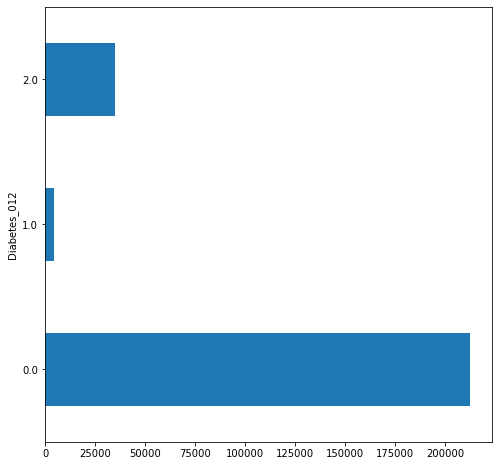

In [45]:
# Determine how many respondants have diabetes, pre-diabetes, or no diabetes



diab_df.groupby(['Diabetes_012']).size().plot(kind="barh",figsize=(8,8))

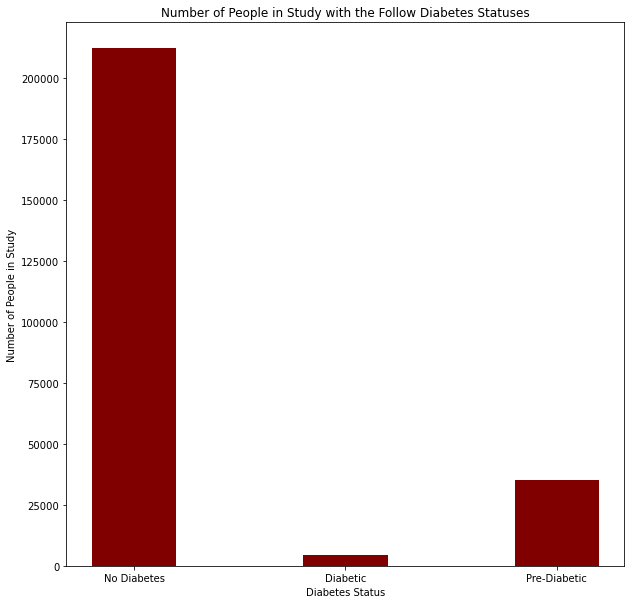

In [46]:
# Create a figure for non-technical viewer

fig = plt.figure(figsize = (10, 10))

x_axis_values = ["No Diabetes","Diabetic","Pre-Diabetic"]
diab_counts = diab_df.groupby(['Diabetes_012']).size()
 
# creating the bar plot
plt.bar(x_axis_values, diab_counts, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Diabetes Status")
plt.ylabel("Number of People in Study")
plt.title("Number of People in Study with the Follow Diabetes Statuses")
plt.show()

In [47]:
# Save Cleaned version of spreadsheet with pre-diabetes

diab_df.to_csv('diabetes_012_prediabetes_BRFSS2015.csv', sep=",", index=False)

# Create a Binary Classification of diabetes versus no diabetes

We will add the pre-diabetic patients to the diabetic patient category since pre-diabetes usually means that you are at risk for diabetes.

Even with adding them, there is still a huge class imbalance between the non - diabetic and diabetic patients.
There is a significant number of diabetic records to allow to make this a 50-50 split between the non-diabetic and diabetic patients.


In [48]:
diab_df_binary = diab_df

#Change the diabetics 2 to a 1 and pre-diabetics 1 to a 0, so that we have 0 meaning non-diabetic and pre-diabetic and 1 meaning diabetic.
diab_df_binary['Diabetes_012'] = diab_df_binary['Diabetes_012'].replace({1:0})
diab_df_binary['Diabetes_012'] = diab_df_binary['Diabetes_012'].replace({2:1})

#Change the column name to Diabetes_binary
diab_df_binary = diab_df_binary.rename(columns = {'Diabetes_012': 'Diabetes_binary'})
diab_df_binary.Diabetes_binary.unique()

array([0., 1.])

In [49]:
diab_df_binary.head()

,Diabetes_binary,HighBP,Asthma,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,Employed,PhysHlth,DiffWalk,Sex,Age,Chronic_Cancer,Education,Weight (lbs),Income
0,0.0,1.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,2.0,15.0,1.0,0.0,9.0,0.0,4.0,280.0,3.0
1,0.0,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,6.0,165.0,1.0
3,0.0,1.0,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,2.0,30.0,1.0,0.0,9.0,1.0,4.0,180.0,8.0
5,0.0,1.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,11.0,0.0,3.0,145.0,6.0
6,0.0,1.0,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,2.0,0.0,0.0,0.0,11.0,0.0,5.0,148.0,4.0


In [50]:
diab_df_binary.groupby(['Diabetes_binary']).size()

Diabetes_binary
0.0    217063
1.0     35126
dtype: int64

In [51]:
#Separate the 0(No Diabetes) and 1&2(Pre-diabetes and Diabetes)
#Get the 1s
is1 = diab_df_binary['Diabetes_binary'] == 1
diab_df_bal_1 = diab_df_binary[is1]

#Get the 0s
is0 = diab_df_binary['Diabetes_binary'] == 0
diab_df_bal_0 = diab_df_binary[is0] 

#Select the 39977 random cases from the 0 (non-diabetes group). we already have 35126 cases from the diabetes risk group
diab_df_bal_0_rand1 = diab_df_bal_0.take(np.random.permutation(len(diab_df_bal_0))[:35126])

#Append the diabetic records to the randomly selected normal records
diab_bal = diab_df_bal_0_rand1.append(diab_df_bal_1, ignore_index = True)

In [52]:
diab_bal.head()

,Diabetes_binary,HighBP,Asthma,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,Employed,PhysHlth,DiffWalk,Sex,Age,Chronic_Cancer,Education,Weight (lbs),Income
0,0.0,0.0,0.0,0.0,1.0,20.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,6.0,125.0,8.0
1,0.0,0.0,1.0,1.0,1.0,32.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,2.0,3.0,1.0,1.0,13.0,0.0,5.0,225.0,3.0
2,0.0,1.0,0.0,0.0,1.0,50.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4.0,30.0,1.0,1.0,0.0,0.0,6.0,0.0,6.0,300.0,5.0
3,0.0,1.0,0.0,1.0,1.0,27.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,12.0,2.0,2.0,0.0,0.0,11.0,0.0,4.0,165.0,5.0
4,0.0,1.0,0.0,1.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,0.0,2.0,30.0,1.0,1.0,11.0,0.0,3.0,88.0,3.0


In [53]:
diab_bal.groupby(['Diabetes_binary']).size()

Diabetes_binary
0.0    35126
1.0    35126
dtype: int64

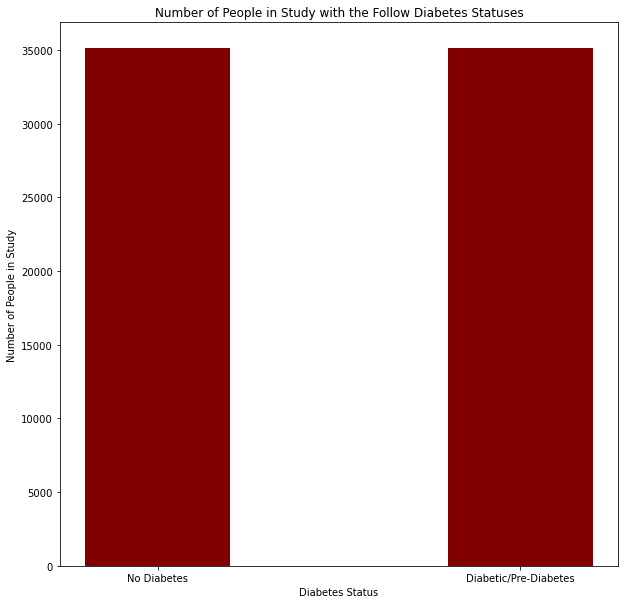

In [54]:
fig = plt.figure(figsize = (10, 10))

x_axis_values = ["No Diabetes","Diabetic/Pre-Diabetes"]
diab_counts = diab_bal.groupby(['Diabetes_binary']).size()
 
# creating the bar plot
plt.bar(x_axis_values, diab_counts, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Diabetes Status")
plt.ylabel("Number of People in Study")
plt.title("Number of People in Study with the Follow Diabetes Statuses")
plt.show()

In [55]:
#Save the balanced dataset to csv
#Save the original binary dataset to csv

diab_bal.to_csv('diabetes_binary_5050_DR_BRFSS2015.csv', sep=",", index=False)

diab_df_binary.to_csv('diabetes_binary_DR_BRFSS2015.csv', sep=",", index=False)
